## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
example = np.load("../../../../data/processed/v1/animal_uf_3.npy", allow_pickle=True)

In [15]:
example[0].keys()

dict_keys(['face_landmarks', 'pose_landmarks', 'left_hand_landmarks', 'right_hand_landmarks', 'pose_world_landmarks', 'timestamp_ms'])

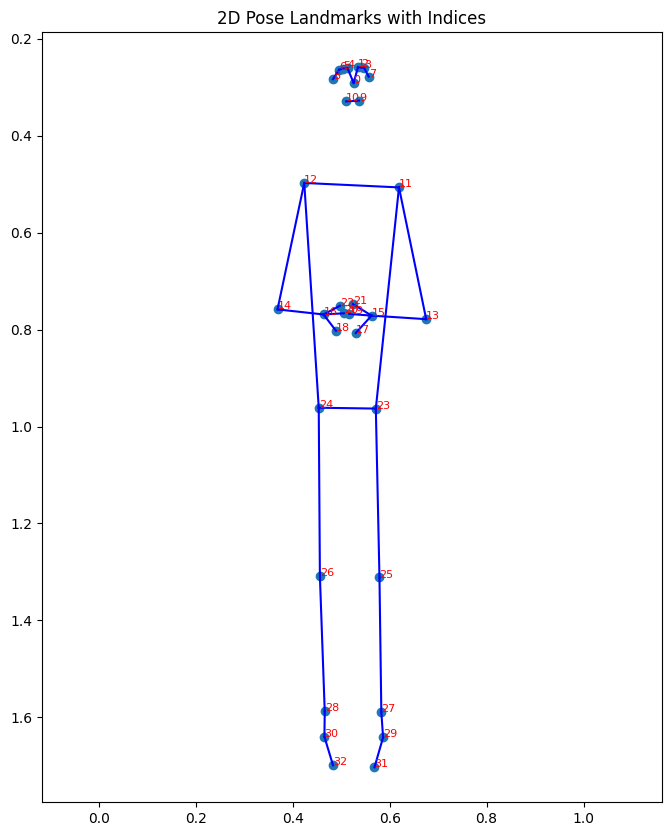

In [ ]:
landmarks = example[0]["pose_landmarks"].landmark
# Extract coordinates
x = [lm.x for lm in landmarks]
y = [lm.y for lm in landmarks]

# Connections based on MediaPipe Pose (partial, common connections)


# Plot
plt.figure(figsize=(8, 10))
plt.scatter(x, y)

# Draw skeleton connections
for start, end in POSE_CONNECTIONS:
    plt.plot([x[start], x[end]], [y[start], y[end]], "b-")

# Add indices or names
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.text(xi, yi, str(i), fontsize=8, color="red")

plt.gca().invert_yaxis()
plt.title("2D Pose Landmarks with Indices")
plt.axis("equal")
plt.show()

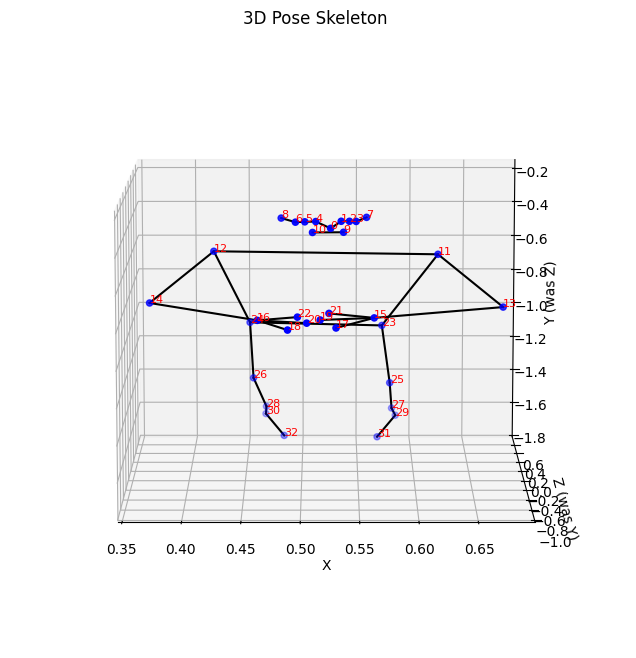

In [37]:
# Extract landmark coordinates
x = [lm.x for lm in landmarks]
y = [lm.y for lm in landmarks]
z = [lm.z for lm in landmarks]

# Swap Y and Z for visualization
y_swapped = z  # Z becomes new Y
z_swapped = [-yi for yi in y]  # Invert original Y (optional, for upright view)

# Pose skeleton connections
POSE_CONNECTIONS = [
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 7),
    (0, 4),
    (4, 5),
    (5, 6),
    (6, 8),
    (9, 10),
    (11, 12),
    (11, 13),
    (13, 15),
    (12, 14),
    (14, 16),
    (15, 17),
    (15, 19),
    (15, 21),
    (16, 18),
    (16, 20),
    (16, 22),
    (11, 23),
    (12, 24),
    (23, 24),
    (23, 25),
    (25, 27),
    (27, 29),
    (29, 31),
    (24, 26),
    (26, 28),
    (28, 30),
    (30, 32),
]

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y_swapped, z_swapped, c="blue", s=20)

# Draw skeleton lines
for start, end in POSE_CONNECTIONS:
    ax.plot(
        [x[start], x[end]],
        [y_swapped[start], y_swapped[end]],
        [z_swapped[start], z_swapped[end]],
        "k-",
    )

# Annotate with indices
for i, (xi, yi, zi) in enumerate(zip(x, y_swapped, z_swapped)):
    ax.text(xi, yi, zi, str(i), color="red", fontsize=8)

ax.set_xlabel("X")
ax.set_ylabel("Z (was Y)")
ax.set_zlabel("Y (was Z)")
ax.set_title("3D Pose Skeleton ")
ax.view_init(elev=10, azim=-90)
plt.show()

In [43]:
import matplotlib.pyplot as plt
import math


def distance_3d(p1, p2):
    return math.sqrt((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2 + (p1.z - p2.z) ** 2)


def plot_pose_with_distances(landmarks, show_labels=True, swap_axes=True):
    x = [lm.x for lm in landmarks]
    y = [lm.y for lm in landmarks]
    z = [lm.z for lm in landmarks]

    # Swap Y and Z if needed
    y_plot = z if swap_axes else y
    z_plot = [-yi for yi in y] if swap_axes else z

    POSE_CONNECTIONS = [
        (0, 1),
        (1, 2),
        (2, 3),
        (3, 7),
        (0, 4),
        (4, 5),
        (5, 6),
        (6, 8),
        (9, 10),
        (11, 12),
        (11, 13),
        (13, 15),
        (12, 14),
        (14, 16),
        (15, 17),
        (15, 19),
        (15, 21),
        (16, 18),
        (16, 20),
        (16, 22),
        (11, 23),
        (12, 24),
        (23, 24),
        (23, 25),
        (25, 27),
        (27, 29),
        (29, 31),
        (24, 26),
        (26, 28),
        (28, 30),
        (30, 32),
    ]

    LIBRAS_PAIRS = [
        (0, 15),
        (0, 16),
        (11, 15),
        (12, 16),
        (15, 17),
        (15, 19),
        (15, 21),
        (16, 18),
        (16, 20),
        (16, 22),
        (15, 9),
        (16, 10),
        (15, 3),
        (16, 6),
        (15, 7),
        (16, 8),
        (15, 11),
        (16, 12),
        (11, 13),
        (12, 14),
        (13, 15),
        (14, 16),
        (23, 25),
        (24, 26),
        (25, 27),
        (26, 28),
        (27, 29),
        (28, 30),
        (29, 31),
        (30, 32),
        (11, 23),
        (12, 24),
        (23, 24),
        (11, 12),
        (9, 10),
        (7, 8),
        (15, 16),
        (13, 14),
    ]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot landmarks
    ax.scatter(x, y_plot, z_plot, c="blue", s=20)

    # Plot skeleton
    for start, end in POSE_CONNECTIONS:
        ax.plot(
            [x[start], x[end]],
            [y_plot[start], y_plot[end]],
            [z_plot[start], z_plot[end]],
            "k-",
            linewidth=1,
        )

    # Plot LIBRAS-relevant distances as red lines with labels
    for i, (start, end) in enumerate(LIBRAS_PAIRS):
        ax.plot(
            [x[start], x[end]],
            [y_plot[start], y_plot[end]],
            [z_plot[start], z_plot[end]],
            "g--",
            linewidth=1.2,
        )
        if show_labels:
            # Midpoint for label
            mx = (x[start] + x[end]) / 2
            my = (y_plot[start] + y_plot[end]) / 2
            mz = (z_plot[start] + z_plot[end]) / 2
            dist = distance_3d(landmarks[start], landmarks[end])
            ax.text(mx, my, mz, f"{dist:.2f}", fontsize=6, color="darkred")

    # Optional: index labels on joints
    for i, (xi, yi, zi) in enumerate(zip(x, y_plot, z_plot)):
        ax.text(xi, yi, zi, str(i), fontsize=7, color="gray")

    ax.set_xlabel("X")
    ax.set_ylabel("Z (was Y)" if swap_axes else "Y")
    ax.set_zlabel("Y (was Z)" if swap_axes else "Z")
    ax.set_title("3D Pose Skeleton with LIBRAS Distances")
    ax.view_init(elev=10, azim=-90)  # side view
    plt.show()

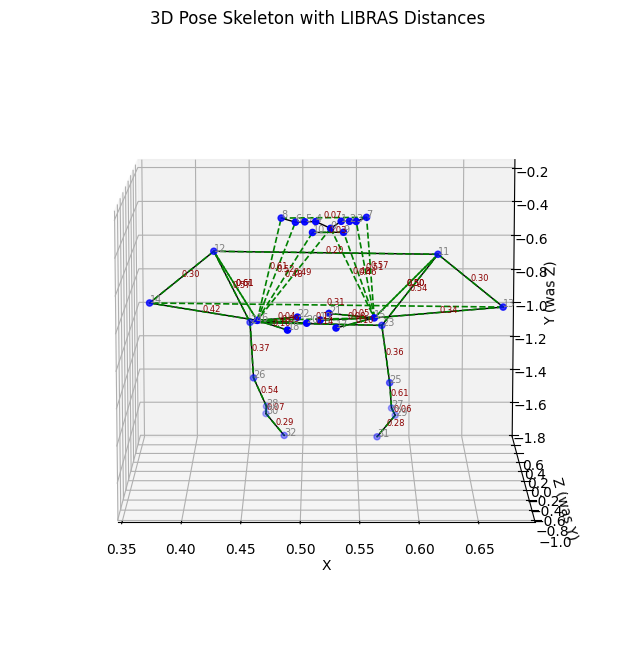

In [44]:
plot_pose_with_distances(landmarks)